## 0. Python API Training - Introductory Notebook

<b>Author:</b> Thodoris Petropoulos <br>
<b>Contributors:</b> Rajiv Shah
 
Welcome to the `Python API Training for DataRobot` course! This notebook provides you with the basics of how to connect to DataRobot, create a project, and execute simple but useful commands. Pay close attention as after you have finished reading this, there will be a series of exercises that you will have to complete in order to get certified! Of course, we do not expect you to know the DataRobot package by heart. You have three main documentation sources you can consult:

- [API Documentation](https://datarobot-public-api-client.readthedocs-hosted.com)
- [Samples](https://github.com/datarobot-community/examples-for-data-scientists)
- [Tutorials](https://github.com/datarobot-community/tutorials-for-data-scientists)

The last two links should provide you with the snippets you need to complete most of these exercises.

Here is a high level overview of this notebook: 

1. Connecting to DataRobot <br>
2. Creating a Project <br>
3. Creating a Project with custom settings <br>
4. Extracting Insights <br>
5. Model Deployment<br>

<b>Data</b>

The dataset we will be using throughout these exercises is the well-known `readmissions dataset`. You can access it or directly download it through DataRobot's public S3 bucket [here](https://s3.amazonaws.com/datarobot_public_datasets/10k_diabetes.csv).

<b>Requirements</b>

- Python version 3.7.3
- DataRobot API version 2.20.0.

Small adjustments might be needed depending on the Python version and DataRobot API version you are using.

### Import Libraries

In [17]:
import datarobot as dr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### 1. Connecting to DataRobot
To use Python with DataRobot you first need to establish a connection between your machine and the DataRobot instance. The fastest and safest way to do that is by creating a `.yaml` file with your credentials. This is basically a text file containing two lines:

`endpoint: "YOUR_HOSTNAME"` <br>
`token: "YOUR_API_TOKEN"`

You can then use the `datarobot.Client` method to connect to DataRobot like below. If you choose not to use a yaml file, this is an example of the command you would use to connect to DataRobot's managed cloud service. (An on-premise customer would have a different endpoint location).

`dr.Client(endpoint='https://app.datarobot.com/api/v2', token = 'YOUR_API_TOKEN')`

In [8]:
dr.Client(config_path='../../github/config.yaml')

### 2. Creating a Project
For Classification, Regression and Multiclass Classification, the process of starting a project (and modeling) is very straightforward. All you have to do is use the `datarobot.Project.start` method.

Of course, there are many advanced options that we could have customised but we are going to touch on that later in this script. For now, we are going to use the default settings.

In [3]:
#I can link directly to my data (file, url) or I can also pass a pandas dataframe to the sourcedata variable
url_to_data = "https://s3.amazonaws.com/datarobot_public_datasets/10k_diabetes.csv" 

project = dr.Project.start(sourcedata = url_to_data,
                           project_name = '00_Introduction',
                           target = 'readmitted',
                           worker_count = -1)

project.wait_for_autopilot()

In progress: 20, queued: 22 (waited: 0s)
In progress: 20, queued: 22 (waited: 2s)
In progress: 20, queued: 22 (waited: 4s)
In progress: 20, queued: 22 (waited: 6s)
In progress: 20, queued: 22 (waited: 9s)
In progress: 20, queued: 22 (waited: 12s)
In progress: 20, queued: 22 (waited: 17s)
In progress: 20, queued: 22 (waited: 25s)
In progress: 20, queued: 18 (waited: 39s)
In progress: 19, queued: 12 (waited: 61s)
In progress: 19, queued: 4 (waited: 82s)
In progress: 20, queued: 1 (waited: 103s)
In progress: 12, queued: 0 (waited: 125s)
In progress: 5, queued: 0 (waited: 146s)
In progress: 2, queued: 0 (waited: 167s)
In progress: 0, queued: 0 (waited: 188s)
In progress: 19, queued: 0 (waited: 209s)
In progress: 19, queued: 0 (waited: 230s)
In progress: 18, queued: 0 (waited: 251s)
In progress: 9, queued: 0 (waited: 272s)
In progress: 1, queued: 0 (waited: 293s)
In progress: 1, queued: 0 (waited: 314s)
In progress: 1, queued: 0 (waited: 335s)
In progress: 11, queued: 0 (waited: 356s)
In pr

The `wait_for_autopilot` method will force our Python Kernel to wait until DataRobot has finished modeling before executing the next series of commands.

The `worker_count` variable defines how many workers is the project going to use when modeling. The value -1 means use all of the available workers.

### 3. Creating a Project with custom settings

Sometimes you will want to start a project using custom settings. More specifically, what if you wanted to:

- Start the project with `3-fold` cross validation
- Start the project with `AUC` as the optimisation metric

To change the optimisation metric, we can just put a custom value in the `metric` variable. When it comes to partitioning, we need to define a partitioning object using the datarobot package. Some of the available partitioning classes are:

- `datarobot.StratifiedCV`
- `datarobot.RandomCV`
- `datarobot.GroupCV`
- `datarobot.UserCV`

`partitioning = dr.StratifiedCV(holdout_pct = 20, reps = 3)`

`c_project=dr.Project.start(sourcedata = url_to_data,
                           project_name = '00_Introduction_with_custom_settings',
                           target = 'readmitted',
                           metric = 'AUC',
                           worker_count = 1,
                           partitioning_method = partitioning)`

### 4. Extracting Insights
There are multiple insights that we would want to extract from a finished project in DataRobot:

1. Trained models <br>
2. Feature Impact<br>
3. ROC Curve<br>

#### Get Trained Models
We can use the `get_models` method to retrieve a list of all the trained DataRobot models. We can then choose the model we want from the list and get access to multiple methods for results/specifics.

By default, the models will be ordered based on their validation score. The first model will be the most accurate one.

In [9]:
project.get_models()[0:10]

[Model('Advanced AVG Blender'),
 Model('ENET Blender'),
 Model('eXtreme Gradient Boosted Trees Classifier with Early Stopping'),
 Model('AVG Blender'),
 Model('ENET Blender'),
 Model('Elastic-Net Classifier (mixing alpha=0.5 / Binomial Deviance) with Unsupervised Learning Features'),
 Model('eXtreme Gradient Boosted Trees Classifier with Early Stopping'),
 Model('Light Gradient Boosting on ElasticNet Predictions '),
 Model('Elastic-Net Classifier (mixing alpha=0.5 / Binomial Deviance)'),
 Model('Elastic-Net Classifier (mixing alpha=0.5 / Binomial Deviance)')]

In [16]:
#Get most accurate model
most_accurate_model = project.get_models()[0]

#Get type of model
print(most_accurate_model.model_type)

Advanced AVG Blender


#### Get Feature Impact

Using the `get_or_request_feature_impact` method, we will be retrieving feature impact, save it into a pandas dataframe and then plot it.

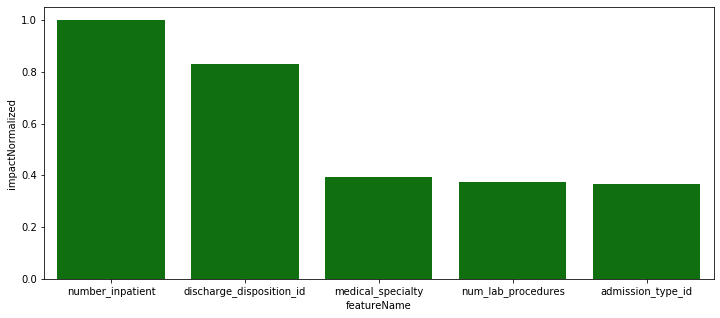

In [18]:
#Get Feature Impact
feature_impact = most_accurate_model.get_or_request_feature_impact()

#Save feature impact in pandas dataframe
fi_df = pd.DataFrame(feature_impact)

fig, ax = plt.subplots(figsize = (12,5))

#Plot feature impact
sns.barplot(x='featureName', y='impactNormalized', data=fi_df[0:5], color='g')

#### Get ROC Curve

ROC curve data can be generated for a specific data partition (validation, cross validation, or holdout) or for all the data partitions. Use the <code>get_roc_curve</code> method combined with the partitioning of your choice. You can then plot the data like below.

(0, 1)

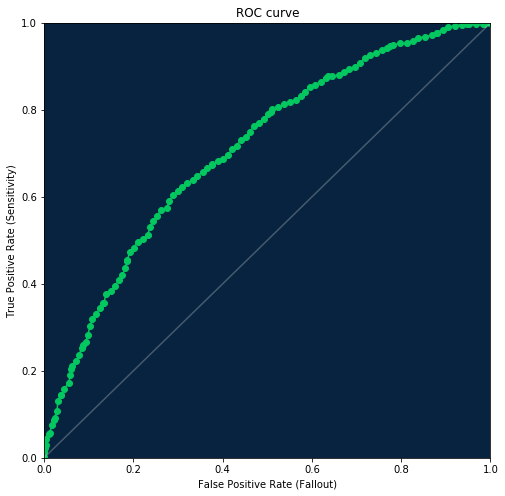

In [19]:
roc = most_accurate_model.get_roc_curve('validation')

#Save the result into a pandas dataframe
roc_df = pd.DataFrame(roc.roc_points)
roc_df.head()

dr_roc_green = '#03c75f'
white = '#ffffff'
dr_purple = '#65147D'
dr_dense_green = '#018f4f'
dr_dark_blue = '#08233F'

fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1, facecolor=dr_dark_blue)

plt.scatter(roc_df.false_positive_rate, roc_df.true_positive_rate, color=dr_roc_green)
plt.plot(roc_df.false_positive_rate, roc_df.true_positive_rate, color=dr_roc_green)
plt.plot([0, 1], [0, 1], color=white, alpha=0.25)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (Fallout)')
plt.xlim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.ylim([0, 1])

### Model Deployment
If you wish to deploy a model, all you have to do is use the `Deployment.create_from_learning_model` method. You also need to have the prediction server that you want to host this deployment. Available prediction servers can be retrieved using the `PredictionServer.list` method.

In [ ]:
prediction_server = dr.PredictionServer.list()[0]

deployment = dr.Deployment.create_from_learning_model(
    most_accurate_model.id, label='New Deployment', description='A new deployment',
    default_prediction_server_id=prediction_server.id)
deployment

### Model Scoring
Now that we have deployed the model let's score using DataRobot's `Batch Prediction API`. Note that there are multiple ways to score data and this is just one of them.

In [14]:
scoring = pd.read_csv('https://s3.amazonaws.com/datarobot_public_datasets/10k_diabetes_scoring.csv', nrows=100)
scoring.to_csv('scoring.csv',index=False)

dr.BatchPredictionJob.score_to_file(
    deployment.id,
    'scoring.csv',
    './predicted.csv')